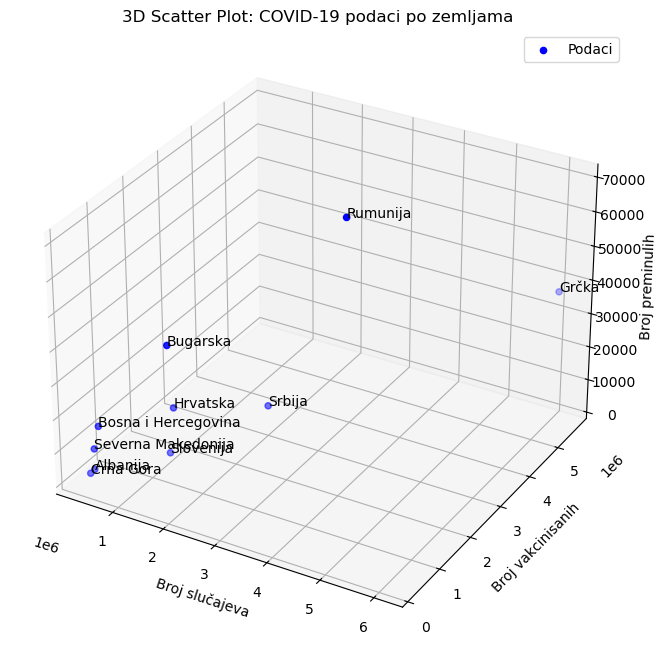

Koeficijent nagiba: 0.9123059806546939
Intercept: -94617.5440127938


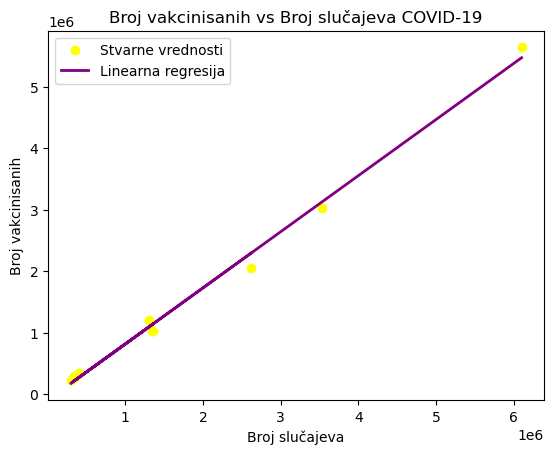

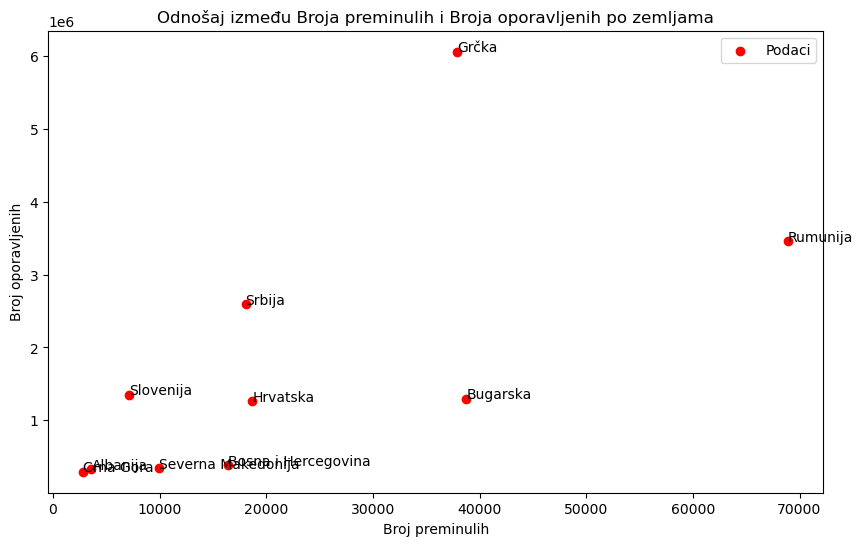

Bezuslovna verovatnoća za Broj slučajeva:
Broj slučajeva
2614665    0.1
1309728    0.1
403585     0.1
296506     0.1
350520     0.1
1356495    0.1
334863     0.1
1339621    0.1
3528237    0.1
6101379    0.1
Name: proportion, dtype: float64

Uslovne verovatnoće za Broj slučajeva u odnosu na Broj vakcinisanih:
Broj slučajeva               296506    334863    350520    403585    1309728  \
Broj vakcinisanih                                                              
(228014.058, 2035400.667]   0.142857  0.142857  0.142857  0.142857  0.142857   
(2035400.667, 3837381.333]  0.000000  0.000000  0.000000  0.000000  0.000000   
(3837381.333, 5639362.0]    0.000000  0.000000  0.000000  0.000000  0.000000   

Broj slučajeva               1339621   1356495  2614665  3528237  6101379  
Broj vakcinisanih                                                          
(228014.058, 2035400.667]   0.142857  0.142857      0.0      0.0      0.0  
(2035400.667, 3837381.333]  0.000000  0.000000      0.5      

C:\Users\mikic\AppData\Local\Temp\ipykernel_12668\2807632315.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  uslovna_verovatnoca_slucajeva_po_vakcinisanim = df.groupby(pd.cut(df['Broj vakcinisanih'], bins=3))['Broj slučajeva'].value_counts(normalize=True).unstack()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D

# Kreiranje DataFrame-a sa datim podacima
data = {
    'Zemlja':['Srbija', 'Hrvatska', 'Bosna i Hercegovina', 'Crna Gora', 'Severna Makedonija', 'Slovenija','Albanija', 'Bugarska', 'Rumunija', 'Grčka' ],
    'Broj slučajeva':[2614665, 1309728, 403585, 296506, 350520, 1356495, 334863, 1339621, 3528237, 6101379],
    'Broj vakcinisanih':[2056402, 1209040, 350242, 233420, 285239, 1020355, 298432, 1024432, 3025963, 5639362],
    'Broj preminulih':[18057, 18687, 16385, 2846, 9971, 7100, 3605, 38741, 68911, 37869],
    'Broj oporavljenih':[2596191, 1258432, 379084, 291794, 337068, 1349377, 330233, 1292690, 3458139, 6063510],
    'Aktivni slucaji':[417, 32609, 8116, 1866, 3481, 18, 1025, 8190, 1187, 0],
    'Broj slucaja/milion stanovnika':[302168, 322650, 124206, 472181, 168414, 652778, 116825, 195719, 185391, 591412],
    'Broj smrti/milion stanovnika':[2087, 4604, 5043, 4532, 4791, 3417, 1258, 5660, 3621, 3671],
    'Broj odradjenih testa':[13445472, 5660084, 1884721, 2769281, 2226216, 2847701, 1941032, 11648127, 28696709, 102228365],
}

df = pd.DataFrame(data)

# Pravljenje 3D scatter plot-a
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dodavanje tačaka na grafikon
ax.scatter(df['Broj slučajeva'], df['Broj vakcinisanih'], df['Broj preminulih'], c='blue', marker='o', label='Podaci')

# Dodavanje oznaka i naslova
ax.set_xlabel('Broj slučajeva')
ax.set_ylabel('Broj vakcinisanih')
ax.set_zlabel('Broj preminulih')
ax.set_title('3D Scatter Plot: COVID-19 podaci po zemljama')

# Dodavanje oznaka za svaku tačku (zemlju)
for i, zemlja in enumerate(df['Zemlja']):
    ax.text(df['Broj slučajeva'][i], df['Broj vakcinisanih'][i], df['Broj preminulih'][i], zemlja)

# Prikazivanje legende
ax.legend()

# Prikazivanje grafikona
plt.show()

# Izdvajamo nezavisnu varijablu (X) i zavisnu varijablu (Y)
X = df[['Broj slučajeva']]
y = df['Broj vakcinisanih']

# Pravimo model linearne regresije
model = LinearRegression()
model.fit(X, y)

# Pravimo predikcije
y_pred = model.predict(X)

# Ispisujemo koeficijente
print('Koeficijent nagiba:', model.coef_[0])
print('Intercept:', model.intercept_)

# Prikazujemo grafikon
plt.scatter(X, y, color='yellow', label='Stvarne vrednosti')
plt.plot(X, y_pred, color='purple', linewidth=2, label='Linearna regresija')
plt.xlabel('Broj slučajeva')
plt.ylabel('Broj vakcinisanih')
plt.title('Broj vakcinisanih vs Broj slučajeva COVID-19')
plt.legend()
plt.show()

# Kreiranje scatter plot-a za odnos između Broja preminulih i Broja oporavljenih
plt.figure(figsize=(10, 6))
plt.scatter(df['Broj preminulih'], df['Broj oporavljenih'], c='red', marker='o', label='Podaci')

# Dodavanje oznaka i naslova
plt.xlabel('Broj preminulih')
plt.ylabel('Broj oporavljenih')
plt.title('Odnošaj između Broja preminulih i Broja oporavljenih po zemljama')

# Dodavanje oznaka za svaku tačku (zemlju)
for i, zemlja in enumerate(df['Zemlja']):
    plt.text(df['Broj preminulih'][i], df['Broj oporavljenih'][i], zemlja)

# Prikazivanje legende
plt.legend()

# Prikazivanje grafikona
plt.show()

# Estimacija bezuslovne verovatnoće za Broj slučajeva
bezuslovna_verovatnoca_slucajeva = df['Broj slučajeva'].value_counts(normalize=True)
print("Bezuslovna verovatnoća za Broj slučajeva:")
print(bezuslovna_verovatnoca_slucajeva)

# Estimacija uslovnih verovatnoća za Broj slučajeva u odnosu na Broj vakcinisanih
uslovna_verovatnoca_slucajeva_po_vakcinisanim = df.groupby(pd.cut(df['Broj vakcinisanih'], bins=3))['Broj slučajeva'].value_counts(normalize=True).unstack()
print("\nUslovne verovatnoće za Broj slučajeva u odnosu na Broj vakcinisanih:")
print(uslovna_verovatnoca_slucajeva_po_vakcinisanim)

# Estimacija parametara združenih raspodela (kovarijanse i korelacije)
kovarijansa_matrix = np.cov(df[['Broj slučajeva', 'Broj vakcinisanih', 'Broj preminulih']].T)
print("\nMatrica kovarijacije:")
print(kovarijansa_matrix)

korelacija_matrix = df[['Broj slučajeva', 'Broj vakcinisanih', 'Broj preminulih']].corr()
print("\nMatrica korelacije:")
print(korelacija_matrix)